# Subtasks

## Read in data

In [491]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.cm as cm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing

In [492]:
raw_x_data = pd.read_csv('../data/X_train.csv').drop('id', axis=1)
raw_y_data = pd.read_csv('../data/y_train.csv').drop('id', axis=1)
raw_data = pd.concat([raw_x_data, raw_y_data], axis=1)

In [493]:
raw_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x823,x824,x825,x826,x827,x828,x829,x830,x831,y
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202,75.0
1,NaN,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,NaN,107841.227180,2.472763,53.0
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,NaN,78.0
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935,65.0
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,NaN,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,NaN,1.930136,86.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


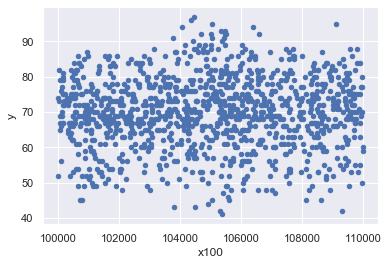

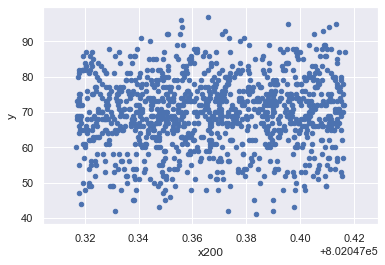

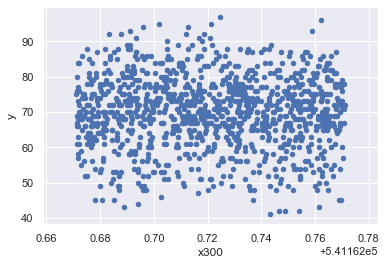

In [494]:
colors = cm.rainbow(np.linspace(0, 1, 4))
raw_data.plot(kind='scatter', x='x100', y='y')
raw_data.plot(kind='scatter', x='x200', y='y')
raw_data.plot(kind='scatter', x='x300', y='y')
plt.show()

(array([ 14.,  56.,  82., 135., 222., 316., 213., 103.,  58.,  13.]),
 array([41. , 46.6, 52.2, 57.8, 63.4, 69. , 74.6, 80.2, 85.8, 91.4, 97. ]),
 <a list of 10 Patch objects>)

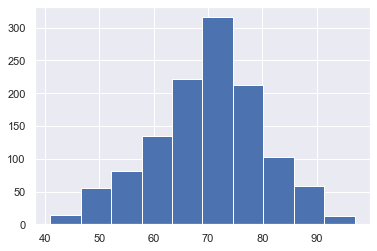

In [495]:
plt.hist(raw_y_data.values.ravel())

## Missing values

In [496]:
# Use mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_data = pd.DataFrame(imp.fit_transform(raw_x_data), columns=raw_x_data.columns)
y_data = raw_y_data

In [497]:
x_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,118345.392781,3104.010883,82378.542430,1086.678601,11395.883550,10.455601,109886.476608,1.054926e+06,101877.946528,2.550290,...,10.769524,10.245068,1021.907543,1031.645762,107440.039766,107083.296966,5559.203921,10.861464,107548.413675,2.299202
1,99950.259599,5889.055991,97932.067482,1116.564363,12172.212426,10.502997,100372.504488,1.011783e+06,108852.296962,2.579040,...,10.859822,10.088023,988.135968,999.044639,105238.779040,106365.468525,10334.091649,10.018963,107841.227180,2.472763
2,95373.022035,6293.442455,93371.369288,1034.722073,11618.142107,10.947611,109337.757279,1.006491e+06,104540.883376,2.573247,...,10.356015,10.514234,995.480813,898.329758,107044.005199,102704.104686,7697.875887,10.277760,103414.594212,2.273542
3,105066.272301,3279.162164,119554.079514,1114.014483,12127.235755,10.540204,106215.391332,1.022381e+06,109597.474506,2.693256,...,10.609811,10.991861,1117.179063,867.267810,100617.082858,108893.304959,6549.131099,9.337688,105722.857008,2.484935
4,98957.033333,4177.482190,97239.708338,1049.430921,10417.250336,10.618957,102736.470171,1.086871e+06,103340.057448,2.540610,...,10.397777,10.549044,863.943966,1041.278922,105352.672454,101705.692839,5388.312773,12.196382,104996.343999,1.930136


## Split data

In [498]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [499]:
x_train.shape

(969, 832)

## Feature selection

In [500]:
n_features = 200;
feature_selector = SelectKBest(f_regression, k=n_features).fit(x_train, y_train.values.ravel())
x_train_new = feature_selector.transform(x_train)
x_test_new = feature_selector.transform(x_test)

/Users/elrich/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/elrich/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/elrich/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/elrich/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/elrich/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [501]:
x_train_new.shape

(969, 200)

## Baseline

### Random forests

In [502]:
rf = RandomForestRegressor(n_estimators=200, max_depth=50, max_features=round(n_features/3), min_samples_split=2)
rf.fit(x_train_new, y_train.values.ravel())
y_train_pred = rf.predict(x_train_new)
train_score = r2_score(y_train, y_train_pred)
print('train score: ', train_score)
y_pred = rf.predict(x_test_new)
test_score = r2_score(y_test, y_pred)
print('test score ', test_score)

train score:  0.9309721249359676
test score  0.5680659730582767


### Boosting

In [610]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(max_depth=3, max_features=50)
boost.fit(x_train_new, y_train.values.ravel())
y_train_pred = boost.predict(x_train_new)
train_score = r2_score(y_train, y_train_pred)
print('train score: ', train_score)
y_pred = boost.predict(x_test_new)
test_score = r2_score(y_test, y_pred)
print('test score ', test_score)

train score:  0.8800298620305584
test score  0.6004535425684439


### XGBoost

In [567]:
model = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 3)
model.fit(x_train_new, y_train.values.ravel())
y_train_pred = model.predict(x_train_new)
train_score = r2_score(y_train, y_train_pred)
print('train score: ', train_score)
y_pred = model.predict(x_test_new)
test_score = r2_score(y_test, y_pred)
print('test score ', test_score)

[13:11:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.8903304938570642
test score  0.6045067719304829


## Grid search

In [505]:
parameters = { 'n_estimators': [50,200], 'max_depth':[10, 20, 50], 'max_features':[round(n_features/3)]}

In [506]:
# grid = GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='r2')
# grid.fit(x_train_new, y_train.values.ravel())

In [507]:
grid.best_params_

{'max_depth': 50, 'max_features': 33, 'n_estimators': 200}

## Test results

In [611]:
x_val = pd.read_csv('../data/X_test.csv').drop('id', axis=1)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x_val = pd.DataFrame(imp.fit_transform(x_val), columns=x_val.columns)
x_val = feature_selector.transform(x_val)
y_pred = rf.predict(x_val)

In [509]:
output = pd.DataFrame({'id':[float(i) for i in range(0,len(x_val))],'y':y_pred})
output.to_csv("rf-200.csv",index=False)

In [612]:
boost_pred = boost.predict(x_val)
output = pd.DataFrame({'id':[float(i) for i in range(0,len(x_val))],'y':boost_pred})
output.to_csv("xgb.csv",index=False)